<a href="https://colab.research.google.com/github/Med-Habbal/Covid19_analyse/blob/main/analyse_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
#pour la carte
import folium

***l'importation des données***

In [2]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_statis = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086


In [4]:
df_confirmed[df_confirmed['Country/Region']=='Morocco']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
187,NaN,Morocco,31.7917,-7.0926,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,468383,469139,469990,470691,471157,471438,472273,473047,473667,474379,474966,475355,475589,476125,476689,477160,477656,478135,478474,478595,479071,479579,480056,480504,480948,481155,481263,481709,482128,482514,482994,483410,483654,483766,484159,484753,485147,485567,485974,486223


In [5]:
df_statis.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-03-08 19:23:25,33.93911,67.709953,55876.0,2451.0,49402.0,4023.0,143.535529,NaN,NaN,4.386499,4,AFG
1,Albania,2021-03-08 19:23:25,41.15330,20.168300,113580.0,1956.0,75887.0,35737.0,3946.764890,NaN,NaN,1.722134,8,ALB
2,Algeria,2021-03-08 19:23:25,28.03390,1.659600,114234.0,3013.0,79064.0,32157.0,260.504636,NaN,NaN,2.637568,12,DZA
3,Andorra,2021-03-08 19:23:25,42.50630,1.521800,11042.0,112.0,10626.0,304.0,14291.076166,NaN,NaN,1.014309,20,AND
4,Angola,2021-03-08 19:23:25,-11.20270,17.873900,21086.0,514.0,19647.0,925.0,64.156965,NaN,NaN,2.437636,24,AGO


Afficher les statistiques au monde

In [6]:
df_statis.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [7]:
global_df=df_statis.copy().drop(['Last_Update', 'Lat', 'Long_','People_Hospitalized','People_Tested', 'ISO3'],axis=1)

In [8]:
global_df.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID
0,Afghanistan,55876.0,2451.0,49402.0,4023.0,143.535529,4.386499,4
1,Albania,113580.0,1956.0,75887.0,35737.0,3946.764890,1.722134,8
2,Algeria,114234.0,3013.0,79064.0,32157.0,260.504636,2.637568,12
3,Andorra,11042.0,112.0,10626.0,304.0,14291.076166,1.014309,20
4,Angola,21086.0,514.0,19647.0,925.0,64.156965,2.437636,24


In [9]:
global_synthese = global_df.copy().drop(['Country_Region','Mortality_Rate','UID','Incident_Rate'],axis=1)

In [10]:
somme_glob = pd.DataFrame(global_synthese.sum()).transpose()
somme_glob

,Confirmed,Deaths,Recovered,Active
0,117045316.0,2597052.0,66258484.0,19740692.0


In [11]:
#visualiser les pays les plus touchés
#les 10 premier pays les plus touchés en coulorant
fig = go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r = 'background-color : red'
  y = 'background-color : purple'
  g = 'background-color : grey'
  df1 = pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,4] = y
  df1.iloc[:,5] = r
  df1.iloc[:,6] = g

  return df1

def show_cases(n):
  n = int(n)
  return df_statis.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases, n = '10')

ipywLayout = widgets.Layout(border='solid: 2px dark')
ipywLayout.display = 'none'
widgets.VBox([fig],layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid:…

In [12]:
df_sort = df_statis.sort_values('Confirmed',ascending=False)
df_sort.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [13]:
px.bar(
    df_sort.head(10),
    x='Country_Region',
    y='Confirmed',
    title='les 10 pays les plus touchés',
    color_discrete_sequence=['pink'],
    height=500,
    width=800
)

In [14]:
px.bar(
    df_sort.head(10),
    x='Country_Region',
    y='Deaths',
    title='le nombre de mort dans les 10 pays les plus touchés',
    color_discrete_sequence=['red'],
    height=500,
    width=800
)

In [15]:
px.bar(
    df_sort.head(10),
    x='Country_Region',
    y='Deaths',
    title='le nombre de cas rétabli dans les 10 pays les plus touchés',
    color_discrete_sequence=['yellow'],
    height=500,
    width=800
)

In [16]:
df_confirmed1 = df_confirmed.copy().dropna(subset = ['Lat','Long'])
df_deaths1 = df_deaths.copy().dropna(subset = ['Lat','Long'])

Visualisation sur une carte

In [17]:
m = folium.Map(location=[31.7917,-7.0926],zoom_start=6,max_zoom=12,min_zoom=2)
for i in range(0,len(df_confirmed1)):
  folium.Circle(
      location=[df_confirmed1.iloc[i]['Lat'],df_confirmed1.iloc[i]['Long']],
      fill=True,
      radius=(int((np.log(df_confirmed1.iloc[i,-1]+1.00001)))+0.2)*50000,
      color='red',
      fill_color='indigo',
      tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+df_confirmed1.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(df_confirmed1.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(df_deaths1.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(df_deaths1.iloc[i,-1]/(df_confirmed1.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)
m
  
#Il y a une comparaison dans toute les pays par la taille du cercle


In [18]:
#une autre façon d'affichage
df_pie = df_statis[df_statis['Confirmed']>2000000]
fig = px.pie(df_pie, values= 'Confirmed', names='Country_Region',title='une petite comparaison entre les pays qui ont plus de 2M de cas en 7 mars 2021')
fig


Une petite visualisation au maroc

In [19]:
#le nombre de cas confirmés au maroc
maroc_conf=df_confirmed[df_confirmed['Country/Region']=='Morocco']
maroc_deaths=df_deaths[df_deaths['Country/Region']=='Morocco']
maroc_recovered=df_recovered[df_recovered['Country/Region']=='Morocco']

In [20]:
maroc_conf = maroc_conf.copy().drop(['Province/State','Country/Region','Lat','Long'],axis=1).sum()
maroc_deaths = maroc_deaths.copy().drop(columns=['Province/State','Country/Region','Lat','Long'],axis=1).sum()
maroc_recovered = maroc_recovered.copy().drop(columns=['Province/State','Country/Region','Lat','Long'],axis=1).sum()

In [21]:
maroc_conf1 = maroc_conf[maroc_conf.values>0]
maroc_deaths1 = maroc_deaths[maroc_deaths.index>='3/2/20']
maroc_recovered1 = maroc_recovered[maroc_recovered.index>='3/2/20']

In [22]:
maroc_deaths1

3/2/20       0
3/3/20       0
3/4/20       0
3/5/20       0
3/6/20       0
          ... 
3/3/21    8653
3/4/21    8669
3/5/21    8673
3/6/21    8676
3/7/21    8682
Length: 209, dtype: int64

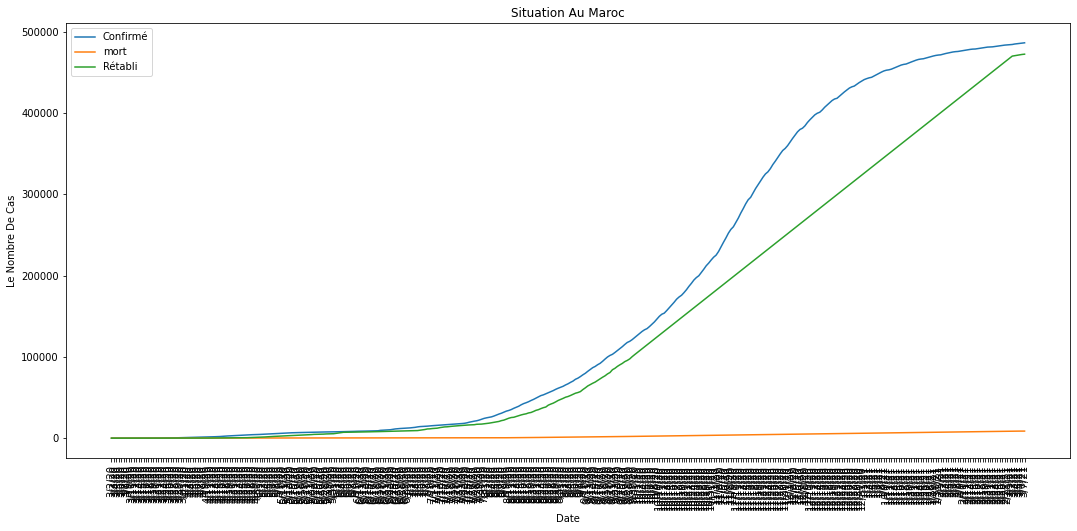

In [23]:
#visualisation
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(maroc_conf1.index,maroc_conf1.values,label='Confirmé')
ax.plot(maroc_deaths1.index,maroc_deaths1.values,label='mort')
ax.plot(maroc_recovered1.index,maroc_recovered1.values,label='Rétabli')
plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Le Nombre De Cas',title='Situation Au Maroc')
plt.legend()
#on voit pas grand chose donc on peut passer peur voir ce que ça va donner par mois

In [24]:
#pour visualiser par mois
maroc_data = pd.DataFrame({'Date':maroc_conf.index, 'Nombre_de_cas':maroc_conf.values,'Nombre_de_decés':maroc_deaths.values,'Nombre_de_rétabli':maroc_recovered.values})
  

In [25]:
maroc_data.tail()

,Date,Nombre_de_cas,Nombre_de_decés,Nombre_de_rétabli
406,3/3/21,484753,8653,470425
407,3/4/21,485147,8669,470933
408,3/5/21,485567,8673,471410
409,3/6/21,485974,8676,471919
410,3/7/21,486223,8682,472240


In [26]:
maroc_data['Date'] = pd.to_datetime(maroc_data['Date'])

Rajouter les colonnes de date

In [27]:
maroc_data['year'] = maroc_data['Date'].dt.year
maroc_data['month'] = maroc_data['Date'].dt.month
maroc_data['day'] = maroc_data['Date'].dt.day

Extraire le nombre de cas par jour

In [28]:
maroc_data['Nombre_de_cas_par_jour']=maroc_data['Nombre_de_cas']
for i in range(1,len(maroc_data)):
  maroc_data['Nombre_de_cas_par_jour'][i]=maroc_data['Nombre_de_cas'][i]-maroc_data['Nombre_de_cas'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



la variation des cas en moyenne par mois

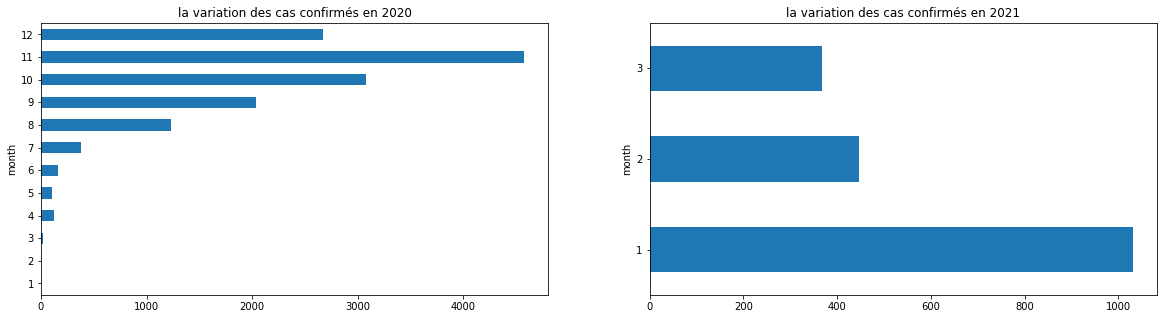

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(121)
maroc_data[maroc_data['year']==2020].groupby(['month'])['Nombre_de_cas_par_jour'].mean().plot.barh(title='la variation des cas confirmés en 2020')
plt.subplot(122)
maroc_data[maroc_data['year']==2021].groupby(['month'])['Nombre_de_cas_par_jour'].mean().plot.barh(title='la variation des cas confirmés en 2021')
#la moyenne étais élevé le mos 11 et à partir de la on revient plus au cas normal

On peut faire aussi une visualisation par jour c-à-d les jours ou on peut éviter de sortir

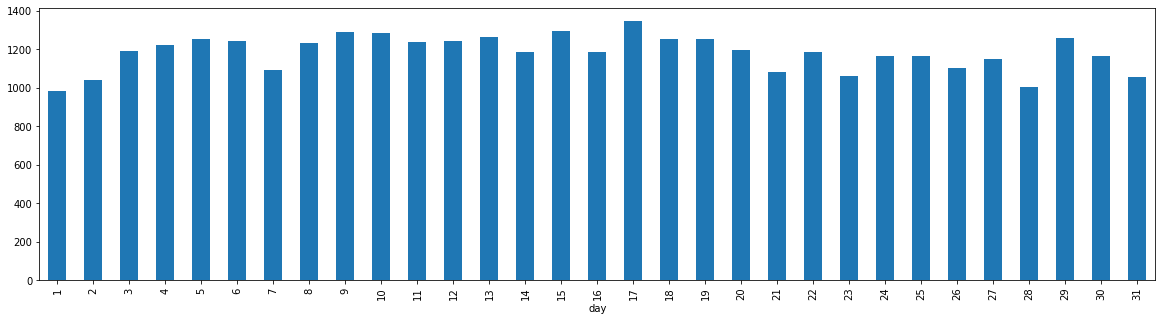

In [30]:
plt.figure(figsize=(20,5))
maroc_data.groupby(['day'])['Nombre_de_cas_par_jour'].mean().plot.bar()
#on ne peut pas conclure à partir d'ici parce que les moyennes sont proches

On passe maintenent pour voir la distribution des cas c-à-d pour voir sa loi de probabilité 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



(array([1.89698544e-03, 4.00605621e-04, 3.41693030e-04, 1.41390219e-04,
        1.64955256e-04, 1.64955256e-04, 2.59215402e-04, 1.76737774e-04,
        5.89125914e-05, 8.24776279e-05, 1.29607701e-04, 1.06042664e-04,
        1.53172738e-04, 8.24776279e-05, 8.24776279e-05, 4.71300731e-05,
        1.06042664e-04, 2.35650366e-05, 2.35650366e-05, 1.06042664e-04,
        3.53475548e-05, 4.71300731e-05, 5.89125914e-05, 0.00000000e+00,
        2.35650366e-05, 1.17825183e-05, 5.89125914e-05, 2.35650366e-05,
        2.35650366e-05, 1.17825183e-05]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. , 2271.5, 2478. , 2684.5, 2891. , 3097.5,
        3304. , 3510.5, 3717. , 3923.5, 4130. , 4336.5, 4543. , 4749.5,
        4956. , 5162.5, 5369. , 5575.5, 5782. , 5988.5, 6195. ]),
 <a list of 30 Patch objects>)

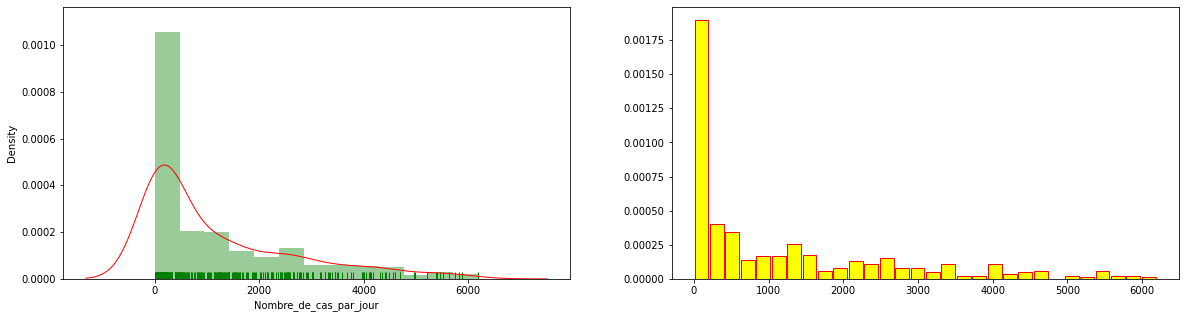

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(maroc_data['Nombre_de_cas_par_jour'], color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})
plt.subplot(122)
plt.hist(maroc_data['Nombre_de_cas_par_jour'],bins=30,rwidth=0.9,color='yellow',edgecolor = 'red',density = True)
#en fait ici j'ai normalisé, pour avoir une fréquence normalée c-à-d qui vaut 1
#Donc la loi de probabilité du nombre de cas est exponentiel